# Educational Access in the Philippines: Identifying Enrollment Disparities Across Regions, Sectors, and Genders

#### <span style="color:purple;"><strong>GROUP 7: Barte | Buhay | Chen | Consorte | Morales</strong></span>

## 🔎 Background of the Dataset

`HistoricalEnrollmentData` is the dataset utilized, which was created September 9, 2024 and updated last November 22, 2022.

### Source of Data and its Role

This dataset was retrieved from the **Department of Education (DepEd) of the Philippines** (https://www.deped.gov.ph/), the government agency responsible for governing the Philippine system of basic education. The Department of Education plays a role in ensuring that every Filipino has access to quality education and equitable access to both formal and non-formal learning opportunities (DBM, n.d.).

The primary mandate of DepEd is to formulate, implement, and coordinate policies geared towards the development of basic education, from elementary through junior high school.

The dataset, `HistoricalEnrollmentData,` serves an important purpose. It helps monitor enrollment trends across different regions in the Philippines. Also, it also enables the government to assess enrollment rates across different sectors and gender groups, ensuring that no Filipino learner is left behind.

### Dataset Content

This dataset provides a view of historical enrollment figures for both Elementary and Junior High School levels in the Philippines. It spans a decade, covering the academic years from 2010-2011 to 2020-2021, and offers detailed breakdowns across several important dimensions. The dataset includes data for Public and Private institutions, as well as State Universities and Colleges (SUCs) and Local Universities and Colleges (LUCs).

Key features of the dataset include:
- **Time Period:** Covers academic years from 2010-2011 to 2020-2021.
- **Institution Types:** Includes Public, Private, SUCs, and LUCs.
- **Geographic Coverage:** Enrollment data is categorized by region.
- **Sectors:** Differentiates enrollment between the public and private sectors.
- **Grade Levels:** Provides detailed enrollment figures for each grade level within elementary and junior high school.
- **Gender:** Breaks down enrollment figures by gender.
- **Number of Enrollees:** Tracks the total number of enrollees.

### Problem Statement

Despite prioritizing education since gaining independence in 1946, the Philippine education system continues to face challenges that restrict access to quality education for many Filipinos. These challenges are rooted in a combination of factors, including poverty, armed conflict, inadequate infrastructure and resources, and the persistent digital divide, which further exacerbates educational inequities (Niyang Bai, 2023).


Thus, this analysis aims to address these issues by using data to identify regions, sectors, and grade levels in the country with the lowest enrollment figures. By examining enrollment trends across various demographics this analysis will provide an understanding of where access to education is most limited.

### Objectives of the Analysis

The primary objectives of this analysis are to:
1. **Analyze enrollment trends** across genders, regions, sectors, and grade levels to identify significant disparities and patterns in enrollment rates among various demographic groups.
2. **Identify regions, sectors, or grade levels with the lowest enrollment** and investigate potential factors contributing to these trends.
3. **Utilize KMeans clustering** to group regions based on enrollment patterns, including factors such as enrollment count, gender disparity, sector type, and grade level, to create targeted interventions based on identified clusters.


In [71]:
!pip install plotly numpy pandas seaborn matplotlib scikit-learn xgboost


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\arian\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [72]:
import datetime
import warnings

import plotly as py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import ticker

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from IPython.core.display import display, HTML

from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings("ignore")

-----------

## 🔎 Preliminary Data Analysis

Conduct an initial exploration of the data. This may include data cleaning, missing value handling, and summary statistics (mean, median, mode, standard deviation).

### Loading of Data

We begin by loading the historical enrollment data for both elementary and junior high school levels using the `pd.read_csv()` function, which reads the CSV files and stores them in the respective dataframes `elem` and `jhs.` 
> The `head()` function is used to display the first few rows of the dataset for initial inspection.

In [73]:
elem = pd.read_csv('HistoricalEnrollmentData_Elem.csv')
jhs = pd.read_csv('HistoricalEnrollmentData_JHS.csv')

In [74]:
elem.head(5)

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
0,2010-2011,PUBLIC,REGION 1,KINDERGARTEN,MALE,"43,376"
1,2010-2011,PUBLIC,REGION 2,KINDERGARTEN,MALE,"13,837"
2,2010-2011,PUBLIC,REGION 3,KINDERGARTEN,MALE,"72,310"
3,2010-2011,PUBLIC,REGION 4A,KINDERGARTEN,MALE,"69,024"
4,2010-2011,PUBLIC,REGION 4B,KINDERGARTEN,MALE,"23,982"


In [75]:
jhs.head(5)

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
0,2010-2011,PUBLIC,REGION 1,GRADE 7,MALE,"44,120"
1,2010-2011,PUBLIC,REGION 2,GRADE 7,MALE,"27,455"
2,2010-2011,PUBLIC,REGION 3,GRADE 7,MALE,"90,794"
3,2010-2011,PUBLIC,REGION 4A,GRADE 7,MALE,"107,787"
4,2010-2011,PUBLIC,REGION 4B,GRADE 7,MALE,"29,048"


### Data Profiling

**➡️ Step 1: Data Type Information**

In [76]:
elem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8568 entries, 0 to 8567
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SCHOOL YEAR          8568 non-null   object
 1   SECTOR               8568 non-null   object
 2   REGION               8568 non-null   object
 3   GRADE LEVEL          8568 non-null   object
 4   GENDER               8568 non-null   object
 5   NUMBER OF ENROLLEES  8568 non-null   object
dtypes: object(6)
memory usage: 401.8+ KB


In [77]:
jhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5202 entries, 0 to 5201
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SCHOOL YEAR          5202 non-null   object
 1   SECTOR               5202 non-null   object
 2   REGION               5202 non-null   object
 3   GRADE LEVEL          5202 non-null   object
 4   GENDER               5202 non-null   object
 5   NUMBER OF ENROLLEES  5202 non-null   object
dtypes: object(6)
memory usage: 244.0+ KB


**➡️ Step 2: Data Shape**

In [78]:
elem.shape

(8568, 6)

In [79]:
jhs.shape

(5202, 6)

**➡️ Step 3: Statistical Information**

In [80]:
elem.describe()

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
count,8568,8568,8568,8568,8568,8568
unique,11,3,34,8,2,5202
top,2016-2017,PUBLIC,REGION 1,KINDERGARTEN,MALE,-
freq,816,2856,456,1122,4284,564


In [81]:
jhs.describe()

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
count,5202,5202,5202,5202,5202,5202
unique,11,3,17,5,3,3690
top,2016-2017,PUBLIC,REGION 1,GRADE 7,FEMALE,-
freq,510,1734,306,1122,2601,259


**➡️ Step 4: Comparing Unique Values**

Column: `GRADE LEVEL`
> `JHS`: ['GRADE 7', 'GRADE 8', 'GRADE 9', 'GRADE 10', 'NON-GRADE']\
> `ELEM`: ['KINDERGARTEN', 'GRADE 1', 'GRADE 2', 'GRADE 3', 'GRADE 4', 'GRADE 5', 'GRADE 6', 'NON-GRADE']

Column: `REGIONS`
> Both `JHS` and `ELEM` cover all 17 regions in the Philippines (e.g., 'REGION 1', 'CAR', 'NCR'). However, ELEM has some regions with extra spaces (' REGION 1 '), indicating potential data cleaning is needed.

Column: `GENDER`
> `JHS` has three unique entries: ['MALE ', 'FEMALE', 'MALE'], which shows inconsistencies in spacing for 'MALE'. Cleaning required.\
> `ELEM` gender data is consistent: ['MALE', 'FEMALE'].

Column: `SECTORS`
> Both datasets distinguish between three sectors: ['PUBLIC', 'PRIVATE', 'SUCSLUCS'].

Column: `SCHOOL YEAR`
> Both datasets span from the 2010-2011 to the 2020-2021 academic years, covering a full decade of enrollment data.

In [82]:
def unique_values(column):
    print(f"\nUNIQUE {column.upper()}")
    print(f"JHS: {jhs[column].unique().tolist()}")
    print(f"ELEM: {elem[column].unique().tolist()}")

columns = ['GRADE LEVEL', 'REGION', 'GENDER', 'SECTOR', 'SCHOOL YEAR']

for column in columns:
    unique_values(column)


UNIQUE GRADE LEVEL
JHS: ['GRADE 7', 'GRADE 8', 'GRADE 9', 'GRADE 10', 'NON-GRADE']
ELEM: ['KINDERGARTEN', 'GRADE 1', 'GRADE 2', 'GRADE 3', 'GRADE 4', 'GRADE 5', 'GRADE 6', 'NON-GRADE']

UNIQUE REGION
JHS: ['REGION 1', 'REGION 2', 'REGION 3', 'REGION 4A', 'REGION 4B', 'REGION 5', 'REGION 6', 'REGION 7', 'REGION 8', 'REGION 9', 'REGION 10', 'REGION 11', 'REGION 12', 'CARAGA', 'BARMM', 'CAR', 'NCR']
ELEM: ['REGION 1', 'REGION 2', 'REGION 3', 'REGION 4A', 'REGION 4B', 'REGION 5', 'REGION 6', 'REGION 7', 'REGION 8', 'REGION 9', 'REGION 10', 'REGION 11', 'REGION 12', 'CARAGA', 'BARMM', 'CAR', 'NCR', ' REGION 1 ', ' REGION 2 ', ' REGION 3 ', ' REGION 4A ', ' REGION 4B ', ' REGION 5 ', ' REGION 6 ', ' REGION 7 ', ' REGION 8 ', ' REGION 9 ', ' REGION 10 ', ' REGION 11 ', ' REGION 12 ', ' CARAGA ', ' BARMM ', ' CAR ', ' NCR ']

UNIQUE GENDER
JHS: ['MALE ', 'FEMALE', 'MALE']
ELEM: ['MALE', 'FEMALE']

UNIQUE SECTOR
JHS: ['PUBLIC', 'PRIVATE', 'SUCSLUCS']
ELEM: ['PUBLIC', 'PRIVATE', 'SUCSLUCS']

UN

**➡️ Step 5: Null Values**

There are no null values for both datasets.

In [83]:
print('ELEMENTARY')
for column in elem.columns:
    missing_values = elem[elem[column].isna()]
    if not missing_values.empty:
        print(f"Missing values found in column: {column}")
        print(missing_values.head(10))
    else:
        print(f"No missing values in column: {column}")

print('\nJUNIOR HIGH SCHOOL')
for column in jhs.columns:
    missing_values = jhs[jhs[column].isna()]
    if not missing_values.empty:
        print(f"Missing values found in column: {column}")
        print(missing_values.head(10))
    else:
        print(f"No missing values in column: {column}")

ELEMENTARY
No missing values in column: SCHOOL YEAR
No missing values in column: SECTOR
No missing values in column: REGION
No missing values in column: GRADE LEVEL
No missing values in column: GENDER
No missing values in column: NUMBER OF ENROLLEES

JUNIOR HIGH SCHOOL
No missing values in column: SCHOOL YEAR
No missing values in column: SECTOR
No missing values in column: REGION
No missing values in column: GRADE LEVEL
No missing values in column: GENDER
No missing values in column: NUMBER OF ENROLLEES


**➡️ Step 6: Checking for Incorrect Formatting**

Column: `SCHOOL YEAR`

In [84]:
print('ELEMENTARY')
inc_sy = elem[~elem["SCHOOL YEAR"].str.match(r"^\d{4}-\d{4}$")]
if inc_sy.empty:
    print("Incorrect SCHOOL YEAR formatting: None")
else:
    print("Incorrect SCHOOL YEAR formatting:")
    print(inc_sy["SCHOOL YEAR"].unique().tolist())


print('\nJUNIOR HIGH SCHOOL')
inc_sy2 = jhs[~jhs["SCHOOL YEAR"].str.match(r"^\d{4}-\d{4}$")]
if inc_sy2.empty:
    print("Incorrect SCHOOL YEAR formatting: None")
else:
    print("Incorrect SCHOOL YEAR formatting:")
    print(inc_sy2["SCHOOL YEAR"].unique().tolist())

ELEMENTARY
Incorrect SCHOOL YEAR formatting: None

JUNIOR HIGH SCHOOL
Incorrect SCHOOL YEAR formatting: None


Column: `REGION`

In [85]:
print('ELEMENTARY')
valid = r"^REGION \d+$|^REGION \d+[A-Z]$|^(CARAGA|BARMM|CAR|NCR)$"
inc_region = elem[~elem["REGION"].str.match(valid)]
if inc_region.empty:
    print("Incorrect REGION formatting: None")
    print("\nList of Regions with correct format:")
    print(df["REGION"].unique().tolist())
else:
    print("Incorrect REGION formatting:")
    print(inc_region["REGION"].unique().tolist())

print('\nJUNIOR HIGH SCHOOL')
inc_region2 = jhs[~jhs["REGION"].str.match(valid)]
if inc_region2.empty:
    print("Incorrect REGION formatting: None")
else:
    print("Incorrect REGION formatting:")
    print(inc_region2["REGION"].unique().tolist())

ELEMENTARY
Incorrect REGION formatting:
[' REGION 1 ', ' REGION 2 ', ' REGION 3 ', ' REGION 4A ', ' REGION 4B ', ' REGION 5 ', ' REGION 6 ', ' REGION 7 ', ' REGION 8 ', ' REGION 9 ', ' REGION 10 ', ' REGION 11 ', ' REGION 12 ', ' CARAGA ', ' BARMM ', ' CAR ', ' NCR ']

JUNIOR HIGH SCHOOL
Incorrect REGION formatting: None


Column: `GRADE LEVEL`

In [86]:
print('ELEMENTARY')
inc_grade = elem[~elem["GRADE LEVEL"].str.match(r"^(GRADE \d+|KINDERGARTEN|NON-GRADE)$")]
if inc_grade.empty:
    print("Incorrect GRADE LEVEL formatting: None")
else:
    print("Incorrect GRADE LEVEL formatting:")
    print(inc_grade["GRADE LEVEL"].unique().tolist())


print('\nJUNIOR HIGH SCHOOL')
inc_grade2 = jhs[~jhs["GRADE LEVEL"].str.match(r"^(GRADE \d+|KINDERGARTEN|NON-GRADE)$")]
if inc_grade2.empty:
    print("Incorrect GRADE LEVEL formatting: None")
else:
    print("Incorrect GRADE LEVEL formatting:")
    print(inc_grade2["GRADE LEVEL"].unique().tolist())

ELEMENTARY
Incorrect GRADE LEVEL formatting: None

JUNIOR HIGH SCHOOL
Incorrect GRADE LEVEL formatting: None


Column: `GENDER`

In [87]:
print('ELEMENTARY')
valid_format = {'MALE', 'FEMALE'}
inc_gender = elem[~elem["GENDER"].isin(valid_format)]
if inc_gender.empty:
    print("Incorrect GENDER formatting: None")
else:
    print("Incorrect GENDER formatting:")
    print(inc_gender["GENDER"].unique().tolist())


print('\nJUNIOR HIGH SCHOOL')
inc_gender2 = jhs[~jhs["GENDER"].isin(valid_format)]
if inc_gender2.empty:
    print("Incorrect GENDER formatting: None")
else:
    print("Incorrect GENDER formatting:")
    print(inc_gender2["GENDER"].unique().tolist())

ELEMENTARY
Incorrect GENDER formatting: None

JUNIOR HIGH SCHOOL
Incorrect GENDER formatting:
['MALE ']


Column: `NUMBER OF ENROLLEES`

In [88]:
print('ELEMENTARY')
inv_num = ~elem["NUMBER OF ENROLLEES"].apply(lambda x: x.isdigit())
if inv_num.any():
    invalid_values = elem.loc[inv_num, "NUMBER OF ENROLLEES"]
    non_numeric_chars = set(''.join(invalid_values)) - set('0123456789')
    print("Characters found that are not numeric:", non_numeric_chars)
else:
    print("All values are in correct format")

print('\nJUNIOR HIGH SCHOOL')
inv_num2 = ~jhs["NUMBER OF ENROLLEES"].apply(lambda x: x.isdigit())
if inv_num2.any():
    invalid_values2 = jhs.loc[inv_num2, "NUMBER OF ENROLLEES"]
    non_numeric_chars2 = set(''.join(invalid_values2)) - set('0123456789')
    print("Characters found that are not numeric:", non_numeric_chars2)
else:
    print("All values are in correct format")

ELEMENTARY
Characters found that are not numeric: {',', '-', ' '}

JUNIOR HIGH SCHOOL
Characters found that are not numeric: {',', '-', ' '}


### Data Cleaning

**➡️ Step 1: Fixing Incorrect Format**

Column: `REGION`

In [89]:
elem['REGION'] = elem['REGION'].str.strip()
jhs['REGION'] = jhs['REGION'].str.strip()

print('Extra Spaces Removed in REGION')
print('JHS:',jhs['REGION'].unique().tolist())
print('ELEM:',elem['REGION'].unique().tolist())

Extra Spaces Removed in REGION
JHS: ['REGION 1', 'REGION 2', 'REGION 3', 'REGION 4A', 'REGION 4B', 'REGION 5', 'REGION 6', 'REGION 7', 'REGION 8', 'REGION 9', 'REGION 10', 'REGION 11', 'REGION 12', 'CARAGA', 'BARMM', 'CAR', 'NCR']
ELEM: ['REGION 1', 'REGION 2', 'REGION 3', 'REGION 4A', 'REGION 4B', 'REGION 5', 'REGION 6', 'REGION 7', 'REGION 8', 'REGION 9', 'REGION 10', 'REGION 11', 'REGION 12', 'CARAGA', 'BARMM', 'CAR', 'NCR']


Column: `GENDER`

In [90]:
elem['GENDER'] = elem['GENDER'].str.strip()
jhs['GENDER'] = jhs['GENDER'].str.strip()

print('Extra Spaces Removed in GENDER')
print('JHS:',jhs['GENDER'].unique().tolist())
print('ELEM:',elem['GENDER'].unique().tolist())

Extra Spaces Removed in GENDER
JHS: ['MALE', 'FEMALE']
ELEM: ['MALE', 'FEMALE']


Column: `NUMBER OF ENROLLEES`

In [91]:
elem["NUMBER OF ENROLLEES"] = elem["NUMBER OF ENROLLEES"].str.replace(',', '', regex=False)
elem["NUMBER OF ENROLLEES"] = elem["NUMBER OF ENROLLEES"].str.replace(' ', '', regex=False)
jhs["NUMBER OF ENROLLEES"] = jhs["NUMBER OF ENROLLEES"].str.replace(',', '', regex=False)
jhs["NUMBER OF ENROLLEES"] = jhs["NUMBER OF ENROLLEES"].str.replace(' ', '', regex=False)

elem_inc_count = elem["NUMBER OF ENROLLEES"].str.contains(',').sum()+elem["NUMBER OF ENROLLEES"].str.contains(' ').sum()
jhs_inc_count = jhs["NUMBER OF ENROLLEES"].str.contains(',').sum()+jhs["NUMBER OF ENROLLEES"].str.contains(' ').sum()

print(f'Number of values with spaces and commas in ELEM: {elem_inc_count}')
print(f'Number of values with spaces and commas in JHS: {jhs_inc_count}')

Number of values with spaces and commas in ELEM: 0
Number of values with spaces and commas in JHS: 0


**➡️ Step 2: Replacing Null Values**

In [92]:
elem["NUMBER OF ENROLLEES"] = elem["NUMBER OF ENROLLEES"].str.replace('-', '0', regex=False)
jhs["NUMBER OF ENROLLEES"] = jhs["NUMBER OF ENROLLEES"].str.replace('-', '0', regex=False)

elem_dash_count = elem["NUMBER OF ENROLLEES"].str.contains('-').sum()
jhs_dash_count = jhs["NUMBER OF ENROLLEES"].str.contains('-').sum()

print(f'Number of values with "-" in ELEM: {elem_dash_count}')
print(f'Number of values with "-" in JHS: {jhs_dash_count}')

Number of values with "-" in ELEM: 0
Number of values with "-" in JHS: 0


**➡️ Step 3: Standardizing Columns**

Column: `SCHOOL YEAR`
> Current dtype: object\
> Converted dtype: category

In [93]:
elem["SCHOOL YEAR"] = elem["SCHOOL YEAR"].astype("category")
jhs["SCHOOL YEAR"] = jhs["SCHOOL YEAR"].astype("category")

print(f'School years changed to {elem["SCHOOL YEAR"].dtype} and {jhs["SCHOOL YEAR"].dtype} type')

School years changed to category and category type


Column: `SECTOR`
> Current dtype: object\
> Converted dtype: category

In [94]:
elem["SECTOR"] = elem["SECTOR"].astype("category")
jhs["SECTOR"] = jhs["SECTOR"].astype("category")

print(f'Sectors changed to {elem["SECTOR"].dtype} and {jhs["SECTOR"].dtype} type')

Sectors changed to category and category type


Column: `REGION`
> Current dtype: object\
> Converted dtype: category

In [95]:
elem["REGION"] = elem["REGION"].astype("category")
jhs["REGION"] = jhs["REGION"].astype("category")

print(f'Regions changed to {elem["REGION"].dtype} and {jhs["REGION"].dtype} type')

Regions changed to category and category type


Column: `GRADE LEVEL`
> Current dtype: object\
> Converted dtype: category

In [96]:
elem["GRADE LEVEL"] = elem["GRADE LEVEL"].astype("category")
jhs["GRADE LEVEL"] = jhs["GRADE LEVEL"].astype("category")

print(f'Grade Levels changed to {elem["GRADE LEVEL"].dtype} and {jhs["GRADE LEVEL"].dtype} type')

Grade Levels changed to category and category type


Column: `GENDER`
> Current dtype: object\
> Converted dtype: category

In [97]:
elem["GENDER"] = elem["GENDER"].astype("category")
jhs["GENDER"] = jhs["GENDER"].astype("category")

print(f'Genders changed to {elem["GENDER"].dtype} and {jhs["GENDER"].dtype} type')

Genders changed to category and category type


Column: `NUMBER OF ENROLLLEES`
> Current dtype: object\
> Converted dtype: int

In [98]:
elem["NUMBER OF ENROLLEES"] = elem["NUMBER OF ENROLLEES"].astype("int")
jhs["NUMBER OF ENROLLEES"] = jhs["NUMBER OF ENROLLEES"].astype("int")

print(f'Number of Enrollees changed to {elem["NUMBER OF ENROLLEES"].dtype} and {jhs["NUMBER OF ENROLLEES"].dtype} type')

Number of Enrollees changed to int64 and int64 type


**➡️ Step 4: Checking for some Outliers**

Summary ststistics specifically for the `NUMBER OF ENROLLEES` column.

In [99]:
elem["NUMBER OF ENROLLEES"].describe()

count      8568.000000
mean      20578.690476
std       31830.630843
min           0.000000
25%          64.000000
50%        2392.500000
75%       35727.250000
max      178471.000000
Name: NUMBER OF ENROLLEES, dtype: float64

In [100]:
jhs["NUMBER OF ENROLLEES"].describe()

count      5202.000000
mean      16061.305459
std       24028.500462
min           0.000000
25%         235.250000
50%        4237.500000
75%       25188.000000
max      139254.000000
Name: NUMBER OF ENROLLEES, dtype: float64

We use **Interquartile Range (IQR) Method** to identify any outliers within the dataset.

In [101]:
# For Elementary Schools (Elem)
E_Q1 = elem["NUMBER OF ENROLLEES"].quantile(0.25)
E_Q3 = elem["NUMBER OF ENROLLEES"].quantile(0.75)

E_IQR = E_Q3 - E_Q1
elem_outliers = elem[(elem["NUMBER OF ENROLLEES"] > (E_Q3 + 1.5 * E_IQR)) | (elem["NUMBER OF ENROLLEES"] < (E_Q1 - 1.5 * E_IQR))].copy()

# For Junior High Schools (JHS)
J_Q1 = jhs["NUMBER OF ENROLLEES"].quantile(0.25)
J_Q3 = jhs["NUMBER OF ENROLLEES"].quantile(0.75)

J_IQR = J_Q3 - J_Q1
jhs_outliers = jhs[(jhs["NUMBER OF ENROLLEES"] > (J_Q3 + 1.5 * J_IQR)) | (jhs["NUMBER OF ENROLLEES"] < (J_Q1 - 1.5 * J_IQR))].copy()

In [102]:
elem_outliers.head(10)

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
104,2010-2011,PUBLIC,REGION 3,GRADE 1,MALE,138511
105,2010-2011,PUBLIC,REGION 4A,GRADE 1,MALE,167419
107,2010-2011,PUBLIC,REGION 5,GRADE 1,MALE,116207
108,2010-2011,PUBLIC,REGION 6,GRADE 1,MALE,119773
109,2010-2011,PUBLIC,REGION 7,GRADE 1,MALE,115038
113,2010-2011,PUBLIC,REGION 11,GRADE 1,MALE,90284
116,2010-2011,PUBLIC,BARMM,GRADE 1,MALE,96364
118,2010-2011,PUBLIC,NCR,GRADE 1,MALE,128292
155,2010-2011,PUBLIC,REGION 3,GRADE 1,FEMALE,119724
156,2010-2011,PUBLIC,REGION 4A,GRADE 1,FEMALE,144143


In [103]:
jhs_outliers.head(10)

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
2,2010-2011,PUBLIC,REGION 3,GRADE 7,MALE,90794
3,2010-2011,PUBLIC,REGION 4A,GRADE 7,MALE,107787
6,2010-2011,PUBLIC,REGION 6,GRADE 7,MALE,71450
7,2010-2011,PUBLIC,REGION 7,GRADE 7,MALE,67210
16,2010-2011,PUBLIC,NCR,GRADE 7,MALE,101432
19,2010-2011,PUBLIC,REGION 3,GRADE 8,MALE,78233
20,2010-2011,PUBLIC,REGION 4A,GRADE 8,MALE,92760
23,2010-2011,PUBLIC,REGION 6,GRADE 8,MALE,63093
33,2010-2011,PUBLIC,NCR,GRADE 8,MALE,88496
36,2010-2011,PUBLIC,REGION 3,GRADE 9,MALE,67934


**➡️ Step 5: Checking for duplicates**

In [104]:
elem_duplicates = elem[elem.duplicated(keep=False)].sort_values(by='NUMBER OF ENROLLEES', ascending=False)
jhs_duplicates = jhs[jhs.duplicated(keep=False)].sort_values(by='NUMBER OF ENROLLEES', ascending=False)

print("Duplicates in Elementary DataFrame (sorted):")
print(elem_duplicates)

print("\nDuplicates in JHS DataFrame (sorted):")
print(jhs_duplicates)

elem = elem.drop_duplicates(keep='first')
jhs = jhs.drop_duplicates(keep='first')

elem_duplicates = elem[elem.duplicated(keep=False)].sort_values(by='NUMBER OF ENROLLEES', ascending=False)
jhs_duplicates = jhs[jhs.duplicated(keep=False)].sort_values(by='NUMBER OF ENROLLEES', ascending=False)

print("Duplicates in Elementary DataFrame after Dropping (sorted):")
print(elem_duplicates)
print("\nDuplicates in JHS DataFrame after Dropping (sorted):")
print(jhs_duplicates)

Duplicates in Elementary DataFrame (sorted):
Empty DataFrame
Columns: [SCHOOL YEAR, SECTOR, REGION, GRADE LEVEL, GENDER, NUMBER OF ENROLLEES]
Index: []

Duplicates in JHS DataFrame (sorted):
Empty DataFrame
Columns: [SCHOOL YEAR, SECTOR, REGION, GRADE LEVEL, GENDER, NUMBER OF ENROLLEES]
Index: []
Duplicates in Elementary DataFrame after Dropping (sorted):
Empty DataFrame
Columns: [SCHOOL YEAR, SECTOR, REGION, GRADE LEVEL, GENDER, NUMBER OF ENROLLEES]
Index: []

Duplicates in JHS DataFrame after Dropping (sorted):
Empty DataFrame
Columns: [SCHOOL YEAR, SECTOR, REGION, GRADE LEVEL, GENDER, NUMBER OF ENROLLEES]
Index: []


### Data Merging

**➡️ Step 1: Renaming Non-Grade Values in Elementary and JHS to Avoid Confusion**

Renaming `NON-GRADE` values under `elem` dataframe.

In [105]:
elem['GRADE LEVEL'] = elem['GRADE LEVEL'].replace('NON-GRADE', 'NON-GRADE (PRIMARY)')

print("\nModified Elementary DataFrame (Non-Grade Only):")
elem[elem['GRADE LEVEL'] == 'NON-GRADE (PRIMARY)']


Modified Elementary DataFrame (Non-Grade Only):


,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
3094,2014-2015,PUBLIC,REGION 1,NON-GRADE (PRIMARY),MALE,934
3095,2014-2015,PUBLIC,REGION 2,NON-GRADE (PRIMARY),MALE,650
3096,2014-2015,PUBLIC,REGION 3,NON-GRADE (PRIMARY),MALE,1984
3097,2014-2015,PUBLIC,REGION 4A,NON-GRADE (PRIMARY),MALE,3560
3098,2014-2015,PUBLIC,REGION 4B,NON-GRADE (PRIMARY),MALE,614
...,...,...,...,...,...,...
8563,2017-2018,SUCSLUCS,REGION 12,NON-GRADE (PRIMARY),MALE,0
8564,2017-2018,SUCSLUCS,CARAGA,NON-GRADE (PRIMARY),MALE,0
8565,2017-2018,SUCSLUCS,BARMM,NON-GRADE (PRIMARY),MALE,0
8566,2017-2018,SUCSLUCS,CAR,NON-GRADE (PRIMARY),MALE,0


Renaming `NON-GRADE` values under `jhs` dataframe.

In [106]:
jhs['GRADE LEVEL'] = jhs['GRADE LEVEL'].replace('NON-GRADE', 'NON-GRADE (SECONDARY)')

print("\nModified jhs DataFrame (Non-Grade Only):")
jhs[jhs['GRADE LEVEL'] == 'NON-GRADE (SECONDARY)']


Modified jhs DataFrame (Non-Grade Only):


,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
2040,2014-2015,PUBLIC,REGION 1,NON-GRADE (SECONDARY),MALE,84
2041,2014-2015,PUBLIC,REGION 2,NON-GRADE (SECONDARY),MALE,0
2042,2014-2015,PUBLIC,REGION 3,NON-GRADE (SECONDARY),MALE,28
2043,2014-2015,PUBLIC,REGION 4A,NON-GRADE (SECONDARY),MALE,96
2044,2014-2015,PUBLIC,REGION 4B,NON-GRADE (SECONDARY),MALE,80
...,...,...,...,...,...,...
5197,2020-2021,SUCSLUCS,REGION 12,NON-GRADE (SECONDARY),FEMALE,0
5198,2020-2021,SUCSLUCS,CARAGA,NON-GRADE (SECONDARY),FEMALE,0
5199,2020-2021,SUCSLUCS,BARMM,NON-GRADE (SECONDARY),FEMALE,0
5200,2020-2021,SUCSLUCS,CAR,NON-GRADE (SECONDARY),FEMALE,0


**➡️ Step 2: Merging Elementary and Junior High School Enrollment Data**

In [107]:
enrollment_hist = pd.merge(elem, jhs, on=['SCHOOL YEAR', 'SECTOR', 'REGION', 'GRADE LEVEL', 'GENDER', 'NUMBER OF ENROLLEES'], how='outer')

In [108]:
enrollment_hist

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES
0,2010-2011,PRIVATE,BARMM,GRADE 1,FEMALE,1409
1,2010-2011,PRIVATE,BARMM,GRADE 1,MALE,1389
2,2010-2011,PRIVATE,BARMM,GRADE 10,FEMALE,3268
3,2010-2011,PRIVATE,BARMM,GRADE 10,MALE,2460
4,2010-2011,PRIVATE,BARMM,GRADE 2,FEMALE,1218
...,...,...,...,...,...,...
13765,2020-2021,SUCSLUCS,REGION 9,KINDERGARTEN,MALE,0
13766,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (PRIMARY),FEMALE,0
13767,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (PRIMARY),MALE,0
13768,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),FEMALE,0


### Creating Data Dictionary

Creating a data dictionary for `enreollment_hist` dataframe.

In [109]:
enrollment_desc = {
    'SCHOOL YEAR': 'The academic year, represented as YYYY-YYYY, during which the data is collected.',
    'SECTOR': 'The sector of education.',
    'REGION': 'The geographical area where the school is located.',
    'GRADE LEVEL': 'The grade or year level of students.',
    'GENDER': 'The gender of the students enrolled.',
    'NUMBER OF ENROLLEES': 'The total number of students enrolled in the specified grade level.'
}

enrollment_hist_dtypes = enrollment_hist.dtypes.apply(lambda x: x.name)

enrollment_dict = pd.DataFrame({
    'Column Name': enrollment_desc.keys(),
    'Data Type': enrollment_hist_dtypes,
    'Description': enrollment_desc.values()
})

enrollment_dict

,Column Name,Data Type,Description
SCHOOL YEAR,SCHOOL YEAR,category,"The academic year, represented as YYYY-YYYY, d..."
SECTOR,SECTOR,category,The sector of education.
REGION,REGION,category,The geographical area where the school is loca...
GRADE LEVEL,GRADE LEVEL,object,The grade or year level of students.
GENDER,GENDER,category,The gender of the students enrolled.
NUMBER OF ENROLLEES,NUMBER OF ENROLLEES,int64,The total number of students enrolled in the s...


### Saving the Data

Saving the merged dataframe, `enrollment_hist`, to a CSV file, `HistoricalEnrollmentData_clean` allows us to efficiently load and reuse the processed data in future analysis, whether for data visualization or modeling, without needing to repeat the cleaning steps.

In [110]:
enrollment_hist.to_csv('HistoricalEnrollmentData_clean.csv', index=False)

### Feature Engineering

New column `SECTOR ENROLLMENT PERCENTAGE` for the proportion of enrollments by sector for each region

In [111]:
# Calculate total enrollment by region and sector
total_enrollment_by_region_sector = enrollment_hist.groupby(['REGION', 'SECTOR'])['NUMBER OF ENROLLEES'].transform('sum')

# Calculate sector enrollment percentage
enrollment_hist['SECTOR ENROLLMENT PERCENTAGE (in %)'] = (enrollment_hist['NUMBER OF ENROLLEES'] / total_enrollment_by_region_sector) * 100

# Round the sector enrollment percentage to 2 decimal places
enrollment_hist['SECTOR ENROLLMENT PERCENTAGE (in %)'] = enrollment_hist['SECTOR ENROLLMENT PERCENTAGE (in %)'].round(2)

enrollment_hist

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES,SECTOR ENROLLMENT PERCENTAGE (in %)
0,2010-2011,PRIVATE,BARMM,GRADE 1,FEMALE,1409,0.24
1,2010-2011,PRIVATE,BARMM,GRADE 1,MALE,1389,0.23
2,2010-2011,PRIVATE,BARMM,GRADE 10,FEMALE,3268,0.55
3,2010-2011,PRIVATE,BARMM,GRADE 10,MALE,2460,0.41
4,2010-2011,PRIVATE,BARMM,GRADE 2,FEMALE,1218,0.20
...,...,...,...,...,...,...,...
13765,2020-2021,SUCSLUCS,REGION 9,KINDERGARTEN,MALE,0,0.00
13766,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (PRIMARY),FEMALE,0,0.00
13767,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (PRIMARY),MALE,0,0.00
13768,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),FEMALE,0,0.00


New column `GROWTH RATE` using REGION, SECTOR, GRADE LEVEL, and SCHOOL YEAR

In [113]:
# Sort the data by relevant columns
enrollment_hist.sort_values(by=['REGION', 'SECTOR', 'GRADE LEVEL', 'SCHOOL YEAR'], inplace=True)

# Calculate the growth rate
enrollment_hist['GROWTH RATE'] = enrollment_hist.groupby(['REGION', 'SECTOR', 'GRADE LEVEL'])['NUMBER OF ENROLLEES'] \
    .transform(lambda x: ((x - x.shift(1)) / (x.shift(1).replace(0, np.nan))) * 100)

# Handle missing or infinite values
enrollment_hist['GROWTH RATE'] = enrollment_hist['GROWTH RATE'].fillna(0).replace([np.inf, -np.inf], 0)

# Round to 2 decimal places
enrollment_hist['GROWTH RATE'] = enrollment_hist['GROWTH RATE'].round(2)

enrollment_hist

,SCHOOL YEAR,SECTOR,REGION,GRADE LEVEL,GENDER,NUMBER OF ENROLLEES,SECTOR ENROLLMENT PERCENTAGE (in %),AVERAGE CLASS SIZE,GROWTH RATE
0,2010-2011,PRIVATE,BARMM,GRADE 1,FEMALE,1409,0.24,108.38,0.00
1,2010-2011,PRIVATE,BARMM,GRADE 1,MALE,1389,0.23,106.85,-1.42
1122,2011-2012,PRIVATE,BARMM,GRADE 1,FEMALE,1293,0.22,99.46,-6.91
1123,2011-2012,PRIVATE,BARMM,GRADE 1,MALE,1271,0.21,97.77,-1.70
2244,2012-2013,PRIVATE,BARMM,GRADE 1,FEMALE,1928,0.32,148.31,51.69
...,...,...,...,...,...,...,...,...,...
11117,2018-2019,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),MALE,0,0.00,0.00,0.00
12442,2019-2020,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),FEMALE,0,0.00,0.00,0.00
12443,2019-2020,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),MALE,0,0.00,0.00,0.00
13768,2020-2021,SUCSLUCS,REGION 9,NON-GRADE (SECONDARY),FEMALE,0,0.00,0.00,0.00


---

## 🔎 Exploratory Data Analysis (EDA)

### Setting up Enrollment count for Visualization by Region in Tableau

In [114]:
def format_number(num):
    if num >= 1e6:
        return f'{num / 1e6:.2f}M'
    elif num >= 1e3:
        return f'{num / 1e3:.2f}K'
    else:
        return str(num)


### Setting up Column for Better Visualization of Total Number of Enrollees from School year 2010-2011 to 2020-2021

In [115]:
region_summary = enrollment_hist.groupby('REGION')['NUMBER OF ENROLLEES'].sum().reset_index()

# Rename columns for clarity
region_summary.columns = ['REGION', 'TOTAL NUMBER OF ENROLLEES']

# Display the result
print(region_summary)

region_summary['NUMBER OF ENROLLEES VISUALIZATION'] = region_summary['TOTAL NUMBER OF ENROLLEES'].apply(format_number)

# Adding Country
region_summary['COUNTRY'] = 'Philippines'

# Adding Provinces to each region (example mapping, you can update this as needed)
province_mapping = {
    'BARMM': ['Basilan', 'Lanao del Sur','Maguindanao', 'Sulu','Tawi-Tawi'],
    'CAR': ['Abra', 'Apayao', 'Benguet', 'Ifugao','Kalinga','Mountain Province'],
    'CARAGA': ['Agusan del Norte', 'Agusan del Sur', 'Dinagat Islands', 'Surigao del Norte','Surigao del Sur'],
    'NCR': ['National Capital Region'],
    'REGION 1': ['Pangasinan', 'Ilocos Norte', 'Ilocos Sur', 'La Union'],
    'REGION 2': ['Cagayan', 'Batanes', 'Isabela', 'Nueva Vizcaya', 'Quirino'],
    'REGION 3': ['Bataan', 'Bulacan', 'Aurora', 'Pampanga', 'Nueva Ecija', 'Tarlac', 'Zambales'],
    'REGION 4A': ['Batangas', 'Cavite', 'Laguna', 'Rizal',  'Quezon'],
    'REGION 4B': ['Marinduque', 'Occidental Mindoro', 'Oriental Mindoro', 'Palawan', 'Romblon'],
    'REGION 5': ['Albay', 'Camarines Norte', 'Camarines Sur', 'Catanduanes', 'Masbate', 'Sorsogon'],
    'REGION 6': ['Aklan', 'Antique', 'Capiz', 'Guimaras', 'Iloilo', 'Negros Occidental'],
    'REGION 7': ['Bohol', 'Cebu', 'Negros Oriental', 'Siquijor'],
    'REGION 8': ['Biliran','Eastern Samar','Leyte','Northern Samar','Southern Leyte', 'Samar'],
    'REGION 9': ['Zamboanga del Norte','Zamboanga del Sur', 'Zamboanga Sibugay'],
    'REGION 10': ['Camiguin', 'Misamis Oriental', 'Lanao del Norte', 'Bukidnon', 'Misamis Occidental'],
    'REGION 11': ['Compostela Valley', 'Davao del Norte', 'Davao del Sur', 'Davao Oriental', 'Davao Occidental'],
    'REGION 12': ['Cotabato', 'Sarangani','South Cotabato','Sultan Kudarat']
}

# Create a new DataFrame to expand the regions to provinces
expanded_data = []

for region, provinces in province_mapping.items():
    # Get the total number of enrollees for this region
    region_enrollees = region_summary[region_summary['REGION'] == region]['TOTAL NUMBER OF ENROLLEES'].values[0]
    # Create a row for each province
    for province in provinces:
        expanded_data.append({
            'REGION': region,
            'PROVINCE': province,
            'TOTAL NUMBER OF ENROLLEES': region_enrollees,
            'NUMBER OF ENROLLEES VISUALIZATION': format_number(region_enrollees),
            'COUNTRY': 'Philippines'
        })

# Create a DataFrame from the expanded data
expanded_df = pd.DataFrame(expanded_data)

# Show the result
print(expanded_df)

       REGION  TOTAL NUMBER OF ENROLLEES
0       BARMM                    9552404
1         CAR                    4352294
2      CARAGA                    7441773
3         NCR                   28101544
4    REGION 1                   12641471
5   REGION 10                   12459379
6   REGION 11                   12831193
7   REGION 12                   12065709
8    REGION 2                    8587587
9    REGION 3                   27753433
10  REGION 4A                   35339067
11  REGION 4B                    8654798
12   REGION 5                   17555088
13   REGION 6                   19936284
14   REGION 7                   19897109
15   REGION 8                   12579670
16   REGION 9                   10120328
       REGION          PROVINCE  TOTAL NUMBER OF ENROLLEES  \
0       BARMM           Basilan                    9552404   
1       BARMM     Lanao del Sur                    9552404   
2       BARMM       Maguindanao                    9552404   
3       BARMM 

In [116]:
# Setting up for Tableau
expanded_df.to_csv('region_summary.csv', index=False)

Visualization can be seen in Tableau

### Enrollment by Sector from School Year 2010-2011 to 2020-2021

SECTOR      PRIVATE     PUBLIC  SUCSLUCS
REGION                                  
BARMM      0.598307   8.783874  0.170223
CAR        0.694054   3.624718  0.033522
CARAGA     0.486812   6.941449  0.013512
NCR        6.044807  22.028816  0.027921
REGION 1   1.401260  11.192712  0.047499
REGION 10  1.326195  11.090209  0.042975
REGION 11  1.340704  11.487242  0.003247
REGION 12  1.171054  10.868215  0.026440
REGION 2   0.874606   7.703113  0.009868
REGION 3   4.177281  23.517920  0.058232
REGION 4A  6.376895  28.898098  0.064074
REGION 4B  0.569046   8.054470  0.031282
REGION 5   1.188975  16.330662  0.035451
REGION 6   1.809617  18.080618  0.046049
REGION 7   2.277298  17.601140  0.018671
REGION 8   0.659581  11.884937  0.035152
REGION 9   0.569523   9.521558  0.029247


<Figure size 1200x600 with 0 Axes>

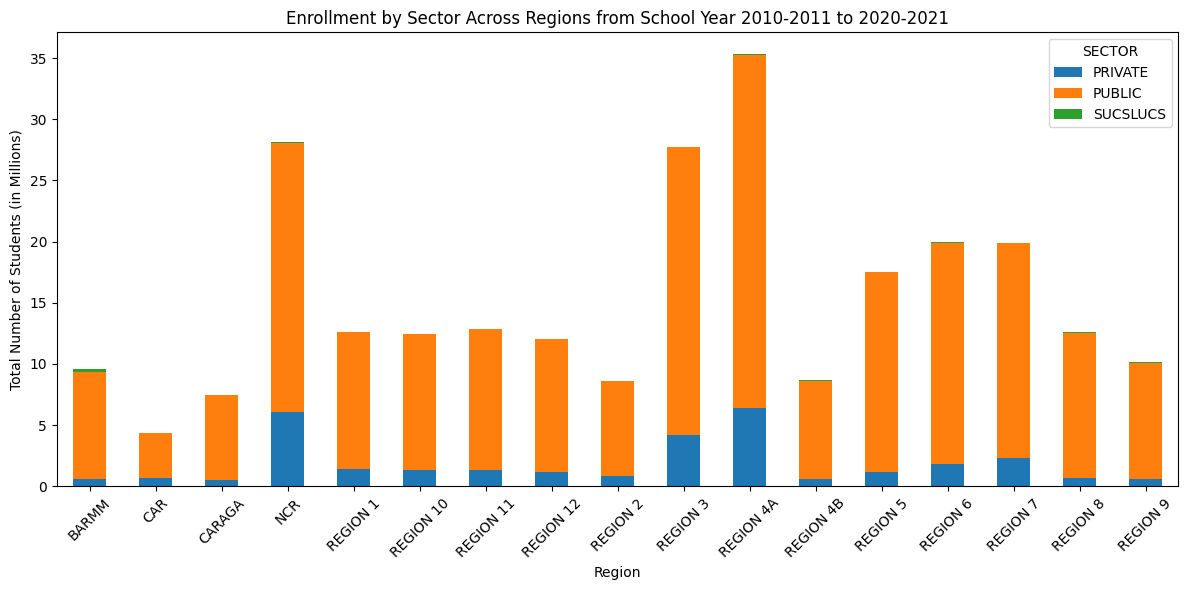

In [117]:
sector_data = enrollment_hist.groupby(['REGION', 'SECTOR'])['NUMBER OF ENROLLEES'].sum().unstack()

# Scale the data to millions
sector_data_millions = sector_data / 1e6

# Display scaled data for verification
print(sector_data_millions)

# Plot the data
plt.figure(figsize=(12, 6))
sector_data_millions.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Enrollment by Sector Across Regions from School Year 2010-2011 to 2020-2021')
plt.ylabel('Total Number of Students (in Millions)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### Average Growth Rate by Region

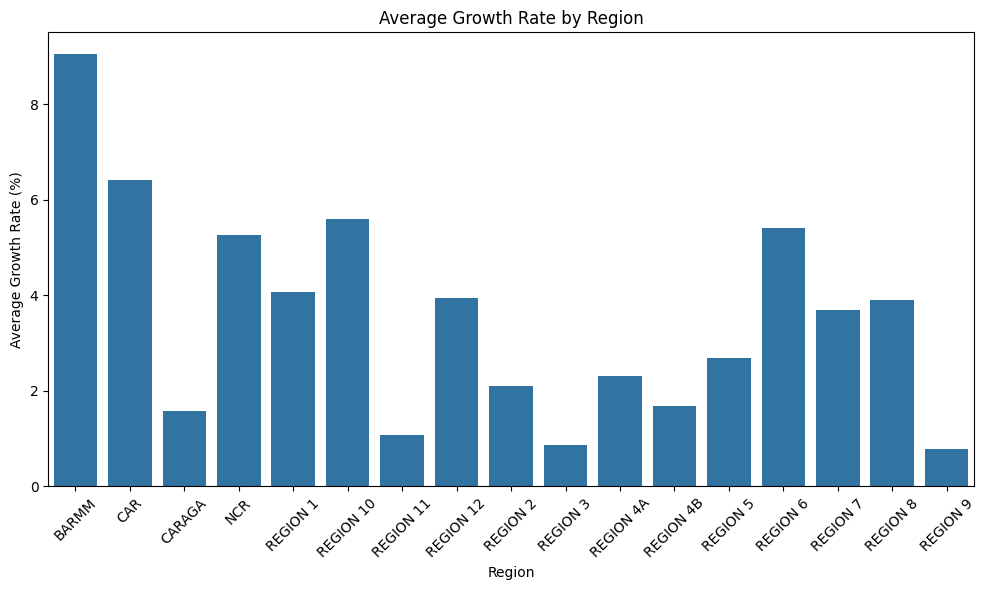

In [118]:
#Bar chart to show average growth rate by region (if 'REGION' is in your data)
plt.figure(figsize=(10, 6))
sns.barplot(data=enrollment_hist, x='REGION', y='GROWTH RATE', estimator='mean', ci=None)
plt.title('Average Growth Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Sectoral Distribution

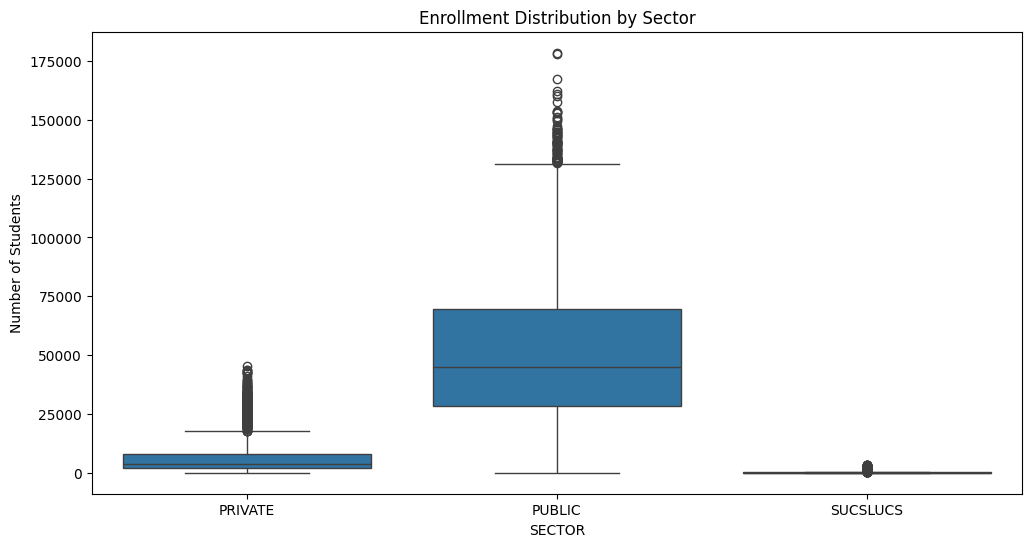

In [119]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='NUMBER OF ENROLLEES', data=enrollment_hist)
plt.title('Enrollment Distribution by Sector')
plt.ylabel('Number of Students')
plt.show()

### Sector Enrollment in Percentage Over The School Years

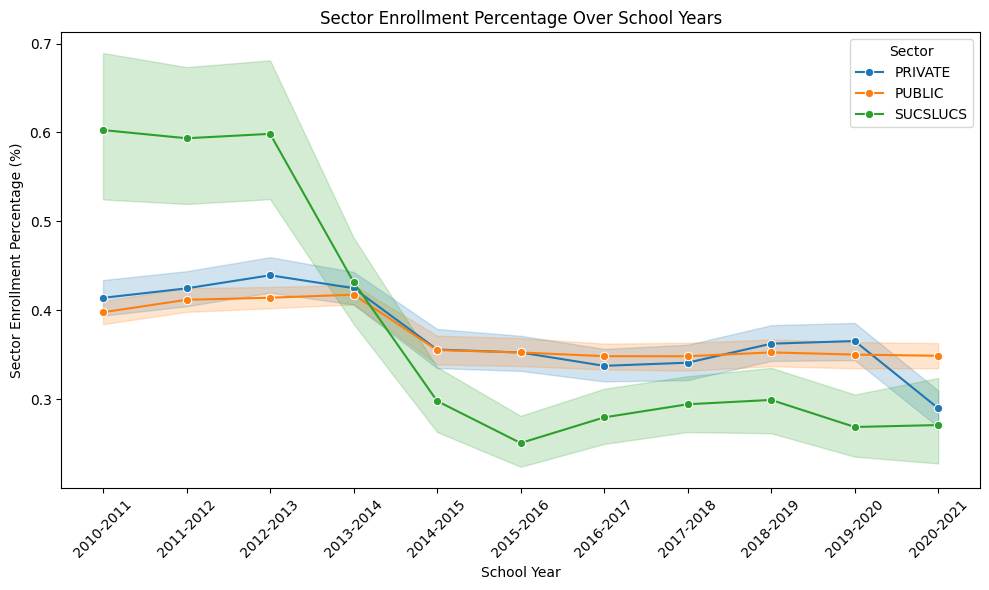

In [120]:
# Line plot to show 'SECTOR ENROLLMENT PERCENTAGE (in %)' over the school years
plt.figure(figsize=(10, 6))
sns.lineplot(data=enrollment_hist, x='SCHOOL YEAR', y='SECTOR ENROLLMENT PERCENTAGE (in %)', hue='SECTOR', marker='o')
plt.title('Sector Enrollment Percentage Over School Years')
plt.xlabel('School Year')
plt.ylabel('Sector Enrollment Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Sector')
plt.tight_layout()
plt.show()

### Number of Enrollee Trends over School Year based on Regions (in Millions)

    SCHOOL YEAR    REGION  NUMBER OF ENROLLEES  NUMBER OF ENROLLEES (MILLIONS)
0     2010-2011     BARMM               993464                        0.993464
1     2010-2011       CAR               390118                        0.390118
2     2010-2011    CARAGA               644090                        0.644090
3     2010-2011       NCR              2583819                        2.583819
4     2010-2011  REGION 1              1150258                        1.150258
..          ...       ...                  ...                             ...
182   2020-2021  REGION 5              1465592                        1.465592
183   2020-2021  REGION 6              1786987                        1.786987
184   2020-2021  REGION 7              1753838                        1.753838
185   2020-2021  REGION 8              1107598                        1.107598
186   2020-2021  REGION 9               916457                        0.916457

[187 rows x 4 columns]


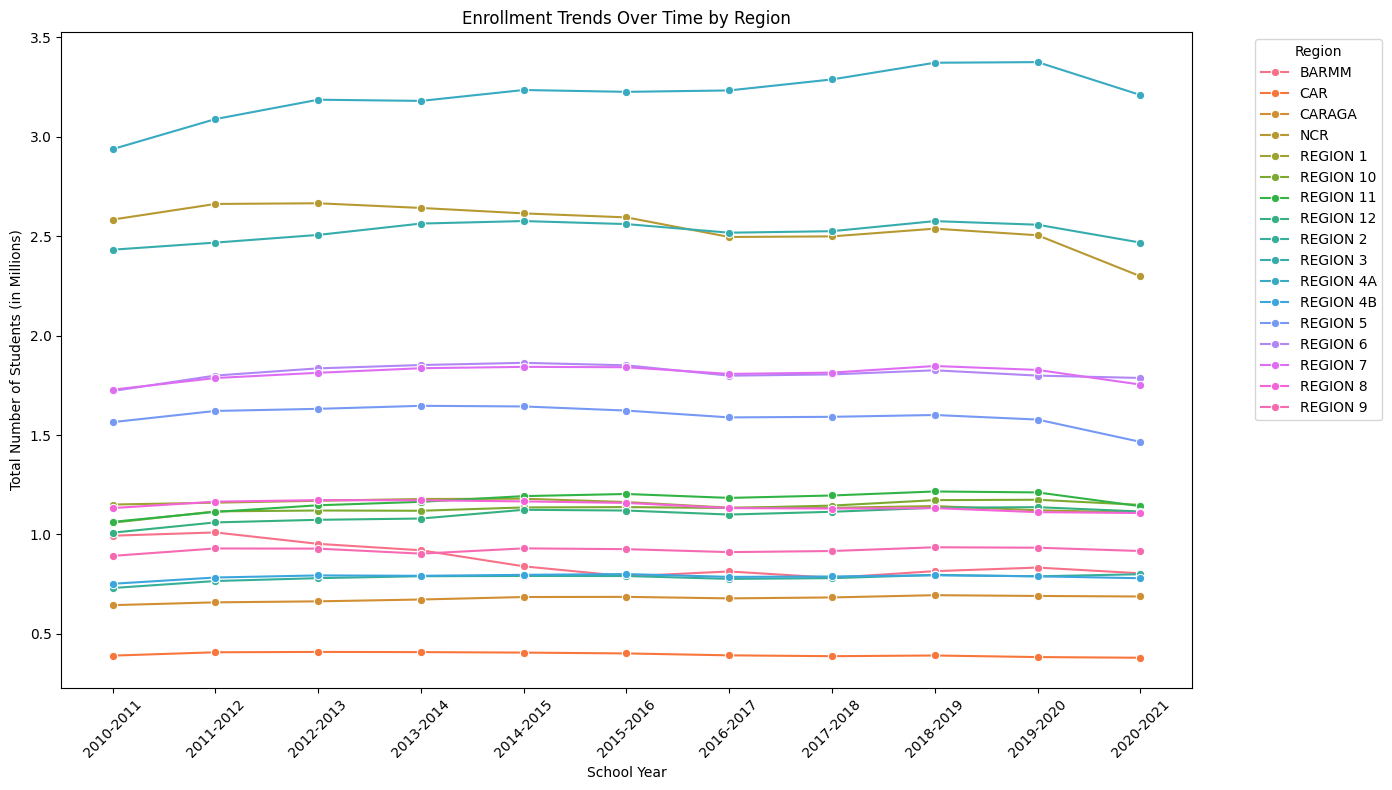

In [121]:
regional_trend = enrollment_hist.groupby(['SCHOOL YEAR', 'REGION'])['NUMBER OF ENROLLEES'].sum().reset_index()

regional_trend['NUMBER OF ENROLLEES (MILLIONS)'] = regional_trend['NUMBER OF ENROLLEES'] / 1e6

# Display scaled data for verification
print(regional_trend)

# Plot the trends
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=regional_trend,
    x='SCHOOL YEAR',
    y='NUMBER OF ENROLLEES (MILLIONS)',
    hue='REGION',
    marker='o'
)

# Update the title and labels to reflect millions properly
plt.title('Enrollment Trends Over Time by Region')
plt.ylabel('Total Number of Students (in Millions)')
plt.xlabel('School Year')
plt.xticks(rotation=45)

# Adjust the y-axis to show appropriate scale and prevent scientific notation
plt.ticklabel_format(axis='y', style='plain', useOffset=False)

# Add legend
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

### Enrollment by Gender and Region (in Millions)

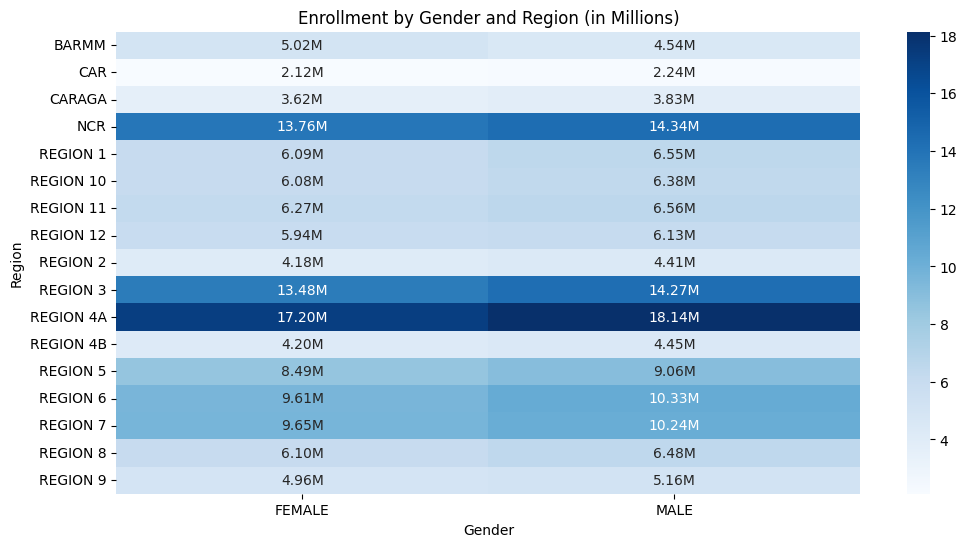

In [122]:
enrollment_gender_matrix = enrollment_hist.pivot_table(values='NUMBER OF ENROLLEES', index='REGION', columns='GENDER', aggfunc='sum')

# Scale the data to millions
enrollment_gender_matrix_in_millions = enrollment_gender_matrix / 1e6

# Format the data as strings with 'M' (for millions)
formatted_enrollment_gender_matrix = enrollment_gender_matrix_in_millions.applymap(lambda x: f'{x:.2f}M')

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(enrollment_gender_matrix_in_millions, annot=formatted_enrollment_gender_matrix, fmt='', cmap='Blues')

# Add labels and title
plt.title('Enrollment by Gender and Region (in Millions)')
plt.xlabel('Gender')
plt.ylabel('Region')

# Show the plot
plt.show()

### Total Enrollees by Grade level and Gender (in Millions)

<Figure size 1200x600 with 0 Axes>

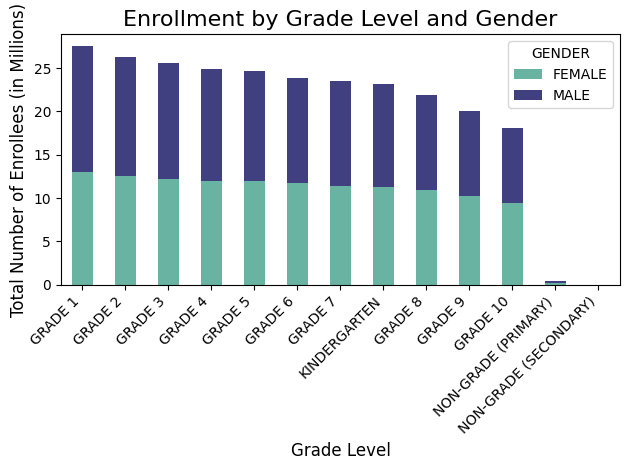

In [123]:
# Group by 'GRADE LEVEL' and 'GENDER' to get total number of enrollees
grade_level_gender = enrollment_hist.groupby(['GRADE LEVEL', 'GENDER'])['NUMBER OF ENROLLEES'].sum().unstack()

# Sort the data in descending order based on total number of enrollees (across both genders)
sorted_index = grade_level_gender.sum(axis=1).sort_values(ascending=False).index
grade_level_gender = grade_level_gender.loc[sorted_index]

# Scale the data to millions
grade_level_gender = grade_level_gender / 1e6

# Define custom colors for the bars
colors = ['#69b3a2', '#404080']  # Change these to your preferred colors

# Plot stacked bar chart with custom colors
plt.figure(figsize=(12, 6))
ax = grade_level_gender.plot(kind='bar', stacked=True, color=colors)

# Set title and labels
plt.title('Enrollment by Grade Level and Gender', fontsize=16)
plt.ylabel('Total Number of Enrollees (in Millions)', fontsize=12)
plt.xlabel('Grade Level', fontsize=12)

# Ensure the x-axis labels are correctly rotated and aligned
plt.xticks(rotation=45, ha='right')

# Adjust layout to make sure labels are properly aligned
plt.tight_layout()

# Show the plot
plt.show()


### The Calculated Average Class Size by Region

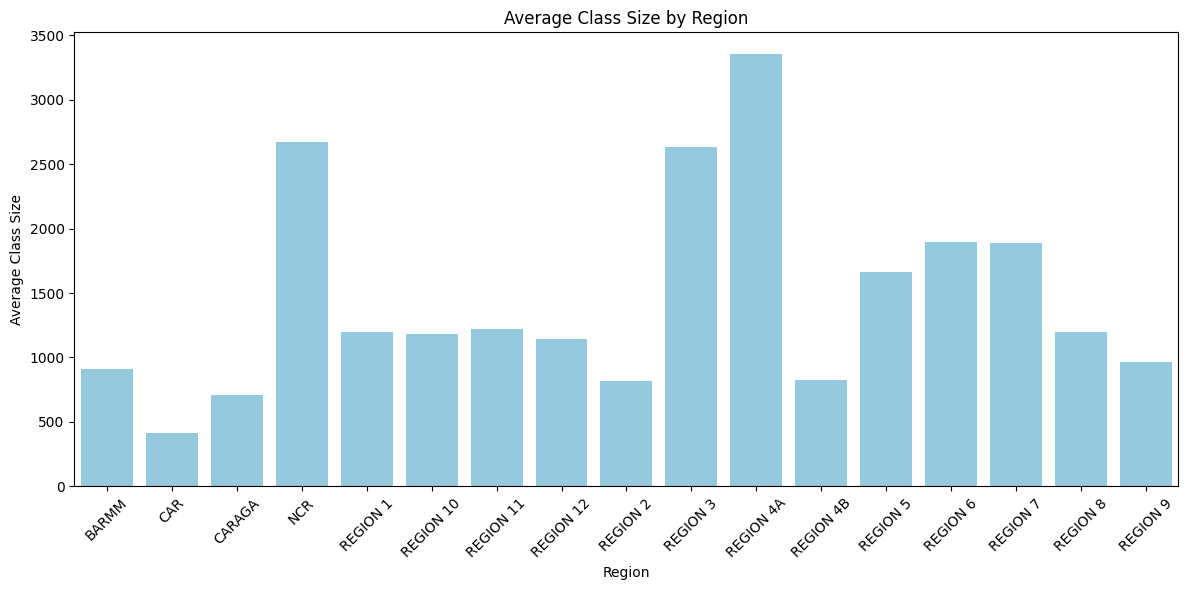

In [125]:
#Bar plot to show the average 'AVERAGE CLASS SIZE' by region 
plt.figure(figsize=(12, 6))
sns.barplot(data=enrollment_hist, x='REGION', y='AVERAGE CLASS SIZE', estimator='mean', ci=None, color='skyblue')
plt.title('Average Class Size by Region')
plt.xlabel('Region')
plt.ylabel('Average Class Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---

## 🔎 KMeans Clustering

K-means is an unsupervised learning method for clustering data points (W3Schools, n.d.). The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster. The goal is to minimize the variance within each cluster — which makes it an ideal choice for identifying patterns in large datasets with no predefined labels.

In the context of our analysis, K-Means clustering is particularly well-suited for grouping regions, sectors, and grade levels with similar enrollment patterns. By clustering the data based on factors such as total enrollment, gender distribution, and sector type, we can highlight regions where enrollment is consistently low or exhibits significant disparities.

### Data Preparation & Encoding

**➡️ Step 1: Load Dataset**

In [126]:
data = 'HistoricalEnrollmentData_clean.csv'
df = pd.read_csv(data)

**➡️ Step 2: Convert Categorical Data to Numeric**

In [127]:
le_region = LabelEncoder()
le_sector = LabelEncoder()
le_grade = LabelEncoder()
le_gender = LabelEncoder()

df['REGION'] = le_region.fit_transform(df['REGION'])  # Encode 'REGION' as numeric
df['SECTOR'] = le_sector.fit_transform(df['SECTOR'])  # Encode 'SECTOR' as numeric
df['GRADE LEVEL'] = le_grade.fit_transform(df['GRADE LEVEL'])  # Encode 'GRADE LEVEL' as numeric
df['GENDER'] = le_gender.fit_transform(df['GENDER'])  # Encode 'GENDER' as numeric


**➡️ Step 3: Select features for clustering**

In [128]:
features = ['REGION', 'SECTOR', 'GRADE LEVEL', 'NUMBER OF ENROLLEES']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### K-Means Clustering

**➡️ Step 1: Find Optimal Clusters using Elbow Method**

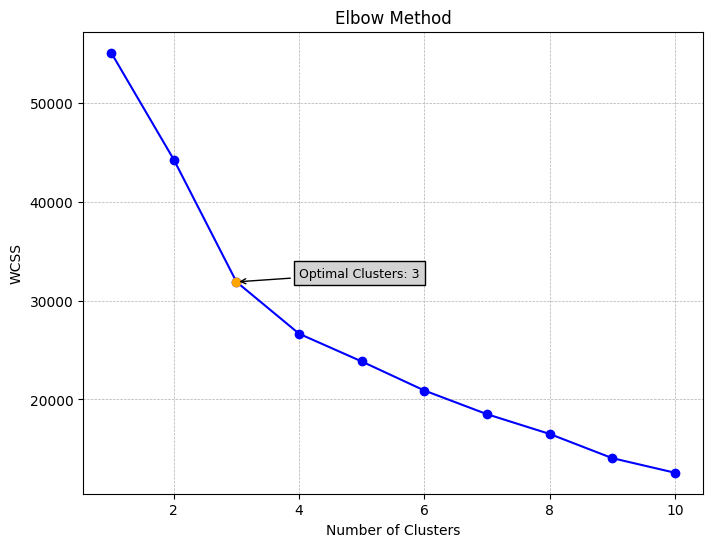

In [129]:
wcss = []  # Within-Cluster Sum of Squared Errors (WCSS)
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Append WCSS value for each cluster count

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='blue')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Identify and mark the "elbow" point
elbow = np.argmax(np.diff(np.diff(wcss))) + 2  # Optimal cluster point is where the second derivative is maximized
plt.plot(elbow, wcss[elbow - 1], 'o', color='orange')  # Highlight the elbow point
plt.annotate(f'Optimal Clusters: {elbow}', xy=(elbow, wcss[elbow - 1]), xytext=(elbow + 1, wcss[elbow - 1] + 500),
             fontsize=9, bbox=dict(facecolor='lightgray'),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.show()

**➡️ Step 2: Fit the KMeans Model**

In [130]:
optimal_clusters = elbow 
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

**➡️ Step 3: Assign Cluster Labels**

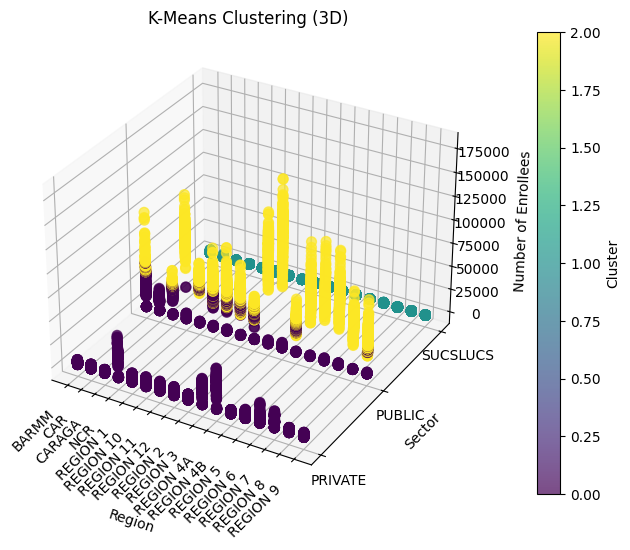

In [131]:
# Plot 3D scatter with original region and sector names
fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['REGION'],  # Numeric region for plotting
    df['SECTOR'],  # Numeric sector for plotting
    df['NUMBER OF ENROLLEES'],  # NUMBER OF ENROLLEES
    c=df['Cluster'], cmap='viridis', s=50, alpha=0.7
)

# Set titles and labels
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Region', labelpad=30)  # Adjust label position with labelpad
ax.set_ylabel('Sector', labelpad=5)
ax.set_zlabel('Number of Enrollees', labelpad=10)

# Add colorbar to show cluster information
cbar = plt.colorbar(scatter, ax=ax, label='Cluster')

# Set the x-axis tick labels to the original region names
ax.set_xticks(df['REGION'].unique())
ax.set_xticklabels(le_region.inverse_transform(df['REGION'].unique()), rotation=45, ha='right')

# Set the z-axis tick labels to the original sector names
ax.set_yticks(df['SECTOR'].unique())
ax.set_yticklabels(le_sector.inverse_transform(df['SECTOR'].unique()))

plt.show()

**➡️ Step 4: Cluster Summary**

In [132]:
df['REGION_LABEL'] = le_region.inverse_transform(df['REGION'])
df['SECTOR_LABEL'] = le_sector.inverse_transform(df['SECTOR'])
gender_mapping = {0: 'male', 1: 'female'}

cluster1_summary = df.groupby('Cluster').agg(
    region_count=('REGION_LABEL', 'count'),
    avg_enrollment=('NUMBER OF ENROLLEES', 'mean'),
    total_enrollment=('NUMBER OF ENROLLEES', 'sum'),
    min_enrollment=('NUMBER OF ENROLLEES', 'min'),
    max_enrollment=('NUMBER OF ENROLLEES', 'max'),
    regions=('REGION_LABEL', lambda x: ', '.join(sorted(x.unique()))),
    sectors=('SECTOR_LABEL', lambda x: ', '.join(sorted(x.unique()))),
    genders=('GENDER', lambda x: ', '.join(sorted(map(lambda g: gender_mapping.get(int(g), g), x.unique())))),  # Map 0 and 1 to male and female
).reset_index()

# Display the comprehensive cluster summary
print("Comprehensive Cluster Summary:")
display(cluster1_summary)

Comprehensive Cluster Summary:


,Cluster,region_count,avg_enrollment,total_enrollment,min_enrollment,max_enrollment,regions,sectors,genders
0,0,6029,9344.372035,56337219,0,49042,"BARMM, CAR, CARAGA, NCR, REGION 1, REGION 10, ...","PRIVATE, PUBLIC","female, male"
1,1,4590,151.059913,693365,0,3358,"BARMM, CAR, CARAGA, NCR, REGION 1, REGION 10, ...",SUCSLUCS,"female, male"
2,2,3151,64372.753729,202838547,17983,178471,"BARMM, CARAGA, NCR, REGION 1, REGION 10, REGIO...",PUBLIC,"female, male"


###### Cluster Specific Information

In [133]:
# Initialize dictionaries to store data for all clusters
region_stats = []
grade_stats = []
sector_stats = []
gender_stats = []

# Iterate through each cluster
for cluster in sorted(df['Cluster'].unique(), reverse=True):
    cluster_data = df[df['Cluster'] == cluster]
    
    # Top and bottom 5 regions
    top_regions = cluster_data['REGION_LABEL'].value_counts().head(5)
    bottom_regions = cluster_data['REGION_LABEL'].value_counts().tail(5)
    region_stats.append({
        "Cluster": cluster,
        "Regions with Most # of Enrollees": "<br>".join(top_regions.index),
        "Regions with Least # of Enrollees": "<br>".join(bottom_regions.index)
    })
    
    # Top and bottom 5 grade levels
    top_grades = cluster_data['GRADE LEVEL'].value_counts().head(5)
    bottom_grades = cluster_data['GRADE LEVEL'].value_counts().tail(5)
    grade_stats.append({
        "Cluster": cluster,
        "Grade Levels with Most # of Enrollees": "<br>".join("Grade " + str(grade) for grade in top_grades.index),
        "Grade Levels with Least # of Enrollees": "<br>".join("Grade " + str(grade) for grade in bottom_grades.index)
    })


    # Sector counts
    sector_counts = cluster_data['SECTOR'].value_counts()
    sector_stats.append({
        "Cluster": cluster,
        "Public Sector": sector_counts.get(1, 0),
        "Private Sector": sector_counts.get(0, 0),
        "SUC/LS Sector": sector_counts.get(2, 0)
    })

    # Gender counts
    gender_counts = cluster_data['GENDER'].value_counts()
    gender_stats.append({
        "Cluster": cluster,
        "Male Count": gender_counts.get(0, 0),
        "Female Count": gender_counts.get(1, 0)
    })

# Convert collected data to DataFrames for visualization
region_df = pd.DataFrame(region_stats).sort_values(by='Cluster', ascending=True) 
grade_df = pd.DataFrame(grade_stats).sort_values(by='Cluster', ascending=True) 
sector_df = pd.DataFrame(sector_stats).sort_values(by='Cluster', ascending=True)
gender_df = pd.DataFrame(gender_stats).sort_values(by='Cluster', ascending=True) 

# Display tables

region_table_html = f"""
<h5>COMPARISON OF REGIONS PER CLUSTER:</h5>
{region_df.to_html(escape=False, index=False)}
"""
display(HTML(region_table_html))
print("=" * 80)

grade_table_html = f"""
<h5>COMPARISON OF GRADE LEVELS PER CLUSTER:</h5>
{grade_df.to_html(escape=False, index=False)}
"""
display(HTML(grade_table_html))
print("=" * 80)

sector_table_html = f"""
<h5>COMPARISON OF SECTORS PER CLUSTER:</h5>
{sector_df.to_html(escape=False, index=False)}
"""
display(HTML(sector_table_html))
print("=" * 80)

gender_table_html = f"""
<h5>COMPARISON OF GENDER PER CLUSTER:</h5>
{gender_df.to_html(escape=False, index=False)}
"""
display(HTML(gender_table_html))
print("=" * 80)


Cluster,Regions with Most # of Enrollees,Regions with Least # of Enrollees
0,CARCARAGABARMMREGION 2REGION 4B,REGION 3REGION 5REGION 6REGION 7REGION 8
1,BARMMCARCARAGANCRREGION 1,REGION 5REGION 6REGION 7REGION 8REGION 9
2,REGION 6REGION 5REGION 7REGION 8REGION 4A,REGION 10REGION 4BREGION 2BARMMCARAGA


Cluster,Grade Levels with Most # of Enrollees,Grade Levels with Least # of Enrollees
0,Grade 9Grade 8Grade 10Grade 7Grade 11,Grade 5Grade 4Grade 3Grade 2Grade 0
1,Grade 0Grade 1Grade 2Grade 3Grade 4,Grade 8Grade 9Grade 10Grade 11Grade 12
2,Grade 0Grade 2Grade 3Grade 4Grade 5,Grade 1Grade 7Grade 10Grade 8Grade 9


Cluster,Public Sector,Private Sector,SUC/LS Sector
0,1439,4590,0
1,0,0,4590
2,3151,0,0


Cluster,Male Count,Female Count
0,3019,3010
1,2295,2295
2,1571,1580


### K-Means Clustering (w/ PCA)

**➡️ Step 1: Use PCA to Reduce Dimensions to 2D**

In [134]:
pca = PCA(n_components=2)  # Reduce to 3 components for 3D visualization
X_pca = pca.fit_transform(X_scaled)

**➡️ Step 2: Create Scatter Plot**

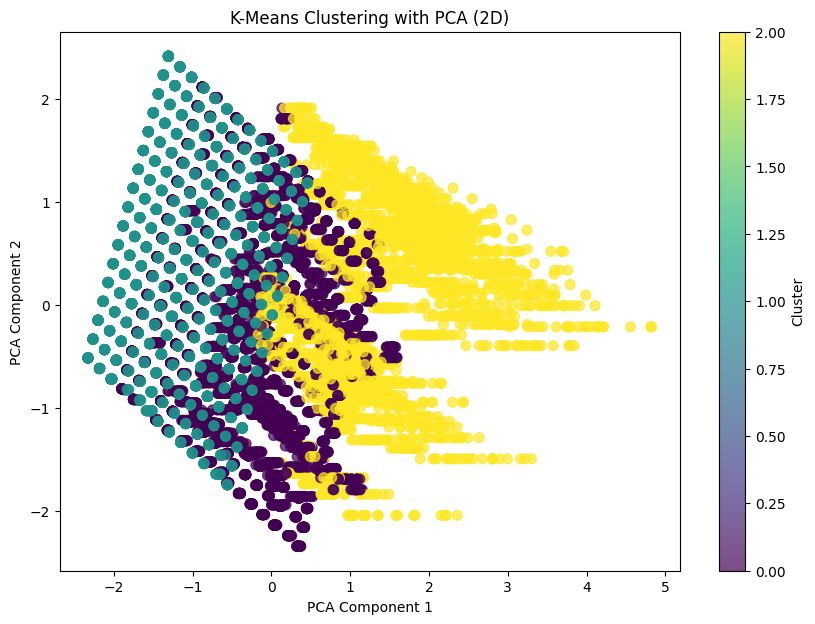

In [135]:
optimal_clusters = elbow  # Use the optimal clusters determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df_copy = df.copy()
df_copy['Cluster'] = kmeans.fit_predict(X_pca)  # Perform clustering using PCA-reduced data

# Step 7: 2D Visualization using PCA clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering with PCA (2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

**➡️ Step 3: Cluster Analysis Summary (Optional)**

In [136]:
gender_mapping = {0: 'male', 1: 'female'}

cluster2_summary = df_copy.groupby('Cluster').agg(
    region_count=('REGION_LABEL', 'count'),
    avg_enrollment=('NUMBER OF ENROLLEES', 'mean'),
    total_enrollment=('NUMBER OF ENROLLEES', 'sum'),
    min_enrollment=('NUMBER OF ENROLLEES', 'min'),
    max_enrollment=('NUMBER OF ENROLLEES', 'max'),
    regions=('REGION_LABEL', lambda x: ', '.join(sorted(x.unique()))),
    sectors=('SECTOR_LABEL', lambda x: ', '.join(sorted(x.unique()))),
    genders=('GENDER', lambda x: ', '.join(sorted(map(lambda g: gender_mapping.get(int(g), g), x.unique())))),  # Map 0 and 1 to male and female
).reset_index()

# Display the comprehensive cluster summary
print("Comprehensive Cluster Summary:")
display(cluster2_summary)

Comprehensive Cluster Summary:


,Cluster,region_count,avg_enrollment,total_enrollment,min_enrollment,max_enrollment,regions,sectors,genders
0,0,4654,4583.236571,21330383,0,59431,"CARAGA, NCR, REGION 1, REGION 10, REGION 11, R...","PRIVATE, PUBLIC, SUCSLUCS","female, male"
1,1,5277,9256.213189,48845037,0,78242,"BARMM, CAR, CARAGA, NCR, REGION 1, REGION 10, ...","PRIVATE, PUBLIC, SUCSLUCS","female, male"
2,2,3839,49412.271685,189693711,905,178471,"BARMM, NCR, REGION 1, REGION 10, REGION 11, RE...","PRIVATE, PUBLIC","female, male"


In [137]:
# Explained variance ratio for the PCA components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio:")
print(f"PC1: {explained_variance[0]:.2f}, PC2: {explained_variance[1]:.2f}")

# PCA Loadings (Feature Contributions)
loadings = pca.components_
print("\nPCA Loadings:")
for i, component in enumerate(loadings, start=1):
    print(f"PC{i}: {dict(zip(features, component))}\n")


Explained Variance Ratio:
PC1: 0.30, PC2: 0.25

PCA Loadings:
PC1: {'REGION': np.float64(0.31251260865664127), 'SECTOR': np.float64(-0.3508717545884812), 'GRADE LEVEL': np.float64(-0.5284173362623737), 'NUMBER OF ENROLLEES': np.float64(0.707106781186547)}

PC2: {'REGION': np.float64(0.8970349708128701), 'SECTOR': np.float64(0.24447619300954193), 'GRADE LEVEL': np.float64(0.36818426390913916), 'NUMBER OF ENROLLEES': np.float64(-5.744790886664746e-15)}



### XGBoost to Predict Number of Enrollees  per Cluster

**➡️ Step 1: Create the model**

In [138]:
# Prepare features and target variable
X = df.drop(['SCHOOL YEAR', 'NUMBER OF ENROLLEES','REGION_LABEL', 'SECTOR_LABEL'], axis=1)
y = df['NUMBER OF ENROLLEES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost DMatrix for training
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',            # Monitoring metric
    'max_depth': 7,                   # Depth of the trees (can tune further)
    'eta': 0.1,                      # Lower learning rate
    'subsample': 0.8,                 # Fraction of data to sample for each tree
    'colsample_bytree': 1.0,          # Fraction of features to sample for each tree
    'min_child_weight': 3,            # Minimum child weight (tuned to avoid overfitting)
    'lambda': 2,                      # L2 regularization
    'alpha': 2                        # L1 regularization
}

# Specify the number of boosting rounds (epochs)
num_boost_round = 500
early_stopping_rounds = 30

# Watchlist for monitoring performance on training and validation data
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Train the model
model = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds)

# Predict on the test set
y_test_pred = model.predict(dtest)
y_train_pred = model.predict(dtrain)

# Calculate the RMSE (Root Mean Squared Error)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Corrected print statement
print(f"Root Mean Squared Error (Test): {test_rmse}, Root Mean Squared Error (Train): {train_rmse}")

# Optionally, print the model's training history
print(f"Best Epoch: {model.best_iteration}")

[0]	train-rmse:26529.81463	test-rmse:26210.54236
[1]	train-rmse:24080.36444	test-rmse:23796.92795
[2]	train-rmse:21882.69339	test-rmse:21621.03762
[3]	train-rmse:19871.00676	test-rmse:19632.12010
[4]	train-rmse:18067.52026	test-rmse:17846.65817
[5]	train-rmse:16475.29989	test-rmse:16274.28602
[6]	train-rmse:15053.33312	test-rmse:14874.76622
[7]	train-rmse:13761.72505	test-rmse:13614.88066
[8]	train-rmse:12642.60054	test-rmse:12515.68573
[9]	train-rmse:11613.57052	test-rmse:11507.13216
[10]	train-rmse:10683.68739	test-rmse:10574.07918
[11]	train-rmse:9878.03555	test-rmse:9796.84524
[12]	train-rmse:9147.25708	test-rmse:9065.62314
[13]	train-rmse:8497.64419	test-rmse:8432.01710
[14]	train-rmse:7935.03095	test-rmse:7861.84833
[15]	train-rmse:7432.87086	test-rmse:7361.44069
[16]	train-rmse:6983.99918	test-rmse:6926.93448
[17]	train-rmse:6606.05742	test-rmse:6562.62441
[18]	train-rmse:6268.70997	test-rmse:6228.13826
[19]	train-rmse:5948.26982	test-rmse:5908.50472
[20]	train-rmse:5686.84492	t

**➡️ Step 2: Compare the Predicted vs Actual Values**

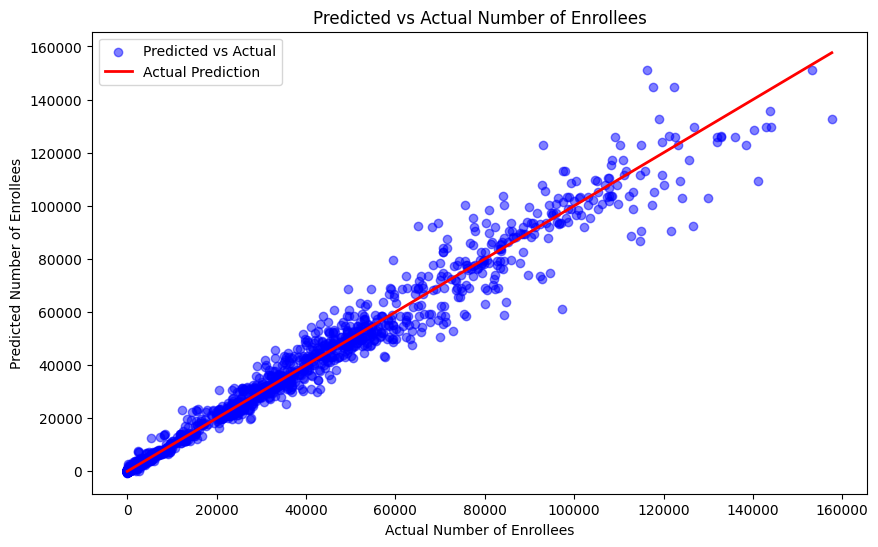

In [139]:
# Plotting the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Actual Prediction')
plt.xlabel('Actual Number of Enrollees')
plt.ylabel('Predicted Number of Enrollees')
plt.title('Predicted vs Actual Number of Enrollees')
plt.legend()
plt.show()

**➡️ Step 3: Predict the Number of Enrollees over School Years (Per Cluster)**

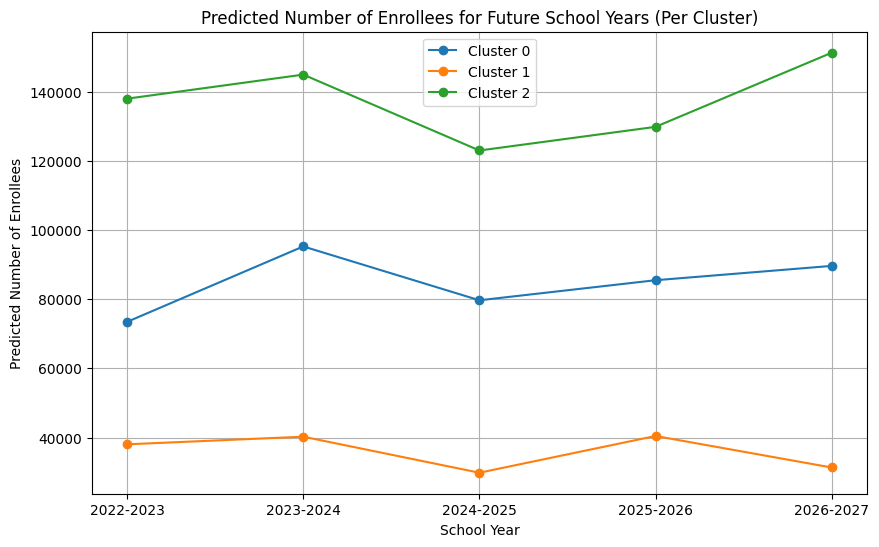

In [140]:
# Example with varying features for future years for different clusters
future_years = [2022, 2023, 2024, 2025, 2026]

# Cluster 1 Public and Private Schools 
future_data_cluster_1 = {
    'SECTOR': [1, 1, 0, 1, 0], 
    'REGION': [4, 4, 3, 4, 3],
    'GRADE LEVEL': [8, 10, 10, 10, 10], 
    'GENDER': [1, 0, 0, 1, 1], 
    'Cluster': [1] * 5  
}

# Cluster 2 SUCs/lUCs Schools 
future_data_cluster_2 = {
    'SECTOR': [2, 2, 2, 2, 2],  
    #'REGION': [10, 3, 9, 13, 14], 
    #'GRADE LEVEL': [0, 1, 2, 3, 4], 
    'REGION': [9, 9, 9, 9, 9],   
    'GRADE LEVEL': [1, 7, 9, 8, 7], 
    'GENDER': [0, 1, 0, 0, 0],
    'Cluster': [2] * 5  
}

# Cluster 3 Public Schools 
future_data_cluster_3 = {
    'SECTOR': [1, 1, 1, 1, 1],  
    'REGION': [10, 10, 9, 10, 10], 
    'GRADE LEVEL': [3, 2, 0, 0, 0],  
    'GENDER': [1, 1, 1, 0, 1], 
    'Cluster': [3] * 5 
}

# Convert each future dataset to DataFrame
X_future_cluster_1 = pd.DataFrame(future_data_cluster_1)
X_future_cluster_2 = pd.DataFrame(future_data_cluster_2)
X_future_cluster_3 = pd.DataFrame(future_data_cluster_3)

# Convert to DMatrix for prediction (separately for each cluster)
dfuture_cluster_1 = xgb.DMatrix(X_future_cluster_1)  
dfuture_cluster_2 = xgb.DMatrix(X_future_cluster_2)  
dfuture_cluster_3 = xgb.DMatrix(X_future_cluster_3)  

# Predict future enrollees for each cluster
y_future_pred_cluster_1 = model.predict(dfuture_cluster_2)
y_future_pred_cluster_2 = model.predict(dfuture_cluster_1)
y_future_pred_cluster_3 = model.predict(dfuture_cluster_3)

# Create DataFrames for predictions for each cluster
future_years_df_cluster_1 = pd.DataFrame({
    'SCHOOL YEAR': future_years,
    'Cluster': ['Cluster 0'] * len(future_years),
    'PREDICTED ENROLLEES': y_future_pred_cluster_1
})

future_years_df_cluster_2 = pd.DataFrame({
    'SCHOOL YEAR': future_years,
    'Cluster': ['Cluster 1'] * len(future_years),
    'PREDICTED ENROLLEES': y_future_pred_cluster_2
})

future_years_df_cluster_3 = pd.DataFrame({
    'SCHOOL YEAR': future_years,
    'Cluster': ['Cluster 2'] * len(future_years),
    'PREDICTED ENROLLEES': y_future_pred_cluster_3
})

# Combine all predictions into one DataFrame
all_future_predictions = pd.concat([future_years_df_cluster_1, future_years_df_cluster_2, future_years_df_cluster_3])

# Plot predictions for all clusters
plt.figure(figsize=(10, 6))
for cluster in all_future_predictions['Cluster'].unique():
    cluster_data = all_future_predictions[all_future_predictions['Cluster'] == cluster]
    plt.plot(cluster_data['SCHOOL YEAR'], cluster_data['PREDICTED ENROLLEES'], marker='o', label=f'{cluster}')

plt.xlabel('School Year')
plt.ylabel('Predicted Number of Enrollees')
plt.title('Predicted Number of Enrollees for Future School Years (Per Cluster)')
school_year_labels = [f"{year}-{year + 1}" for year in future_years]
plt.xticks(future_years, school_year_labels)
plt.grid(True)
plt.legend()
plt.show()

## 🔎 References

Department of Budget and Management (DBM). n.d. Department of Education. https://www.dbm.gov.ph/wp-content/uploads/OPCCB/OPIF2010/DepEd/DepEd.pdf

Niyang, B. (2023, Aug. 3). Educational Challenges in the Philippines. Broken Chalk. https://pidswebs.pids.gov.ph/CDN/document/1691385120_64d07d20eab5b.pdf

W3Schools. (n.d.). K-means. W3Schools. Retrieved on: October 15, 2024. https://www.w3schools.com/python/python_ml_k-means.asp